<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml1027/blob/main/inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
model = InceptionV3(include_top=False, input_shape=(224, 224, 3))
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="inception.png", show_shapes=True)

In [10]:
# 右一線: 1 x 1卷積(64)
# 64組 1 x 1捲機
w = model.get_layer("conv2d_5").get_weights()
print(w[0].shape)

(1, 1, 192, 64)


In [11]:
# 右二線: 模糊化(Average) -> 1 x 1卷積(32)
w = model.get_layer("conv2d_11").get_weights()
print(w[0].shape)

(1, 1, 192, 32)


In [12]:
# 右三線: 1 x 1捲機(48) -> 5 x 5捲機(64)
# 1 x 1 捲機: 減低計算量
w = model.get_layer("conv2d_6").get_weights()
print(w[0].shape)
w = model.get_layer("conv2d_7").get_weights()
print(w[0].shape)

(1, 1, 192, 48)
(5, 5, 48, 64)


In [13]:
# 右四線: 1 x 1捲機(64) -> 3 x 3捲機(96) -> 3 x 3捲機(96)
w = model.get_layer("conv2d_8").get_weights()
print(w[0].shape)
w = model.get_layer("conv2d_9").get_weights()
print(w[0].shape)
w = model.get_layer("conv2d_10").get_weights()
print(w[0].shape)

(1, 1, 192, 64)
(3, 3, 64, 96)
(3, 3, 96, 96)


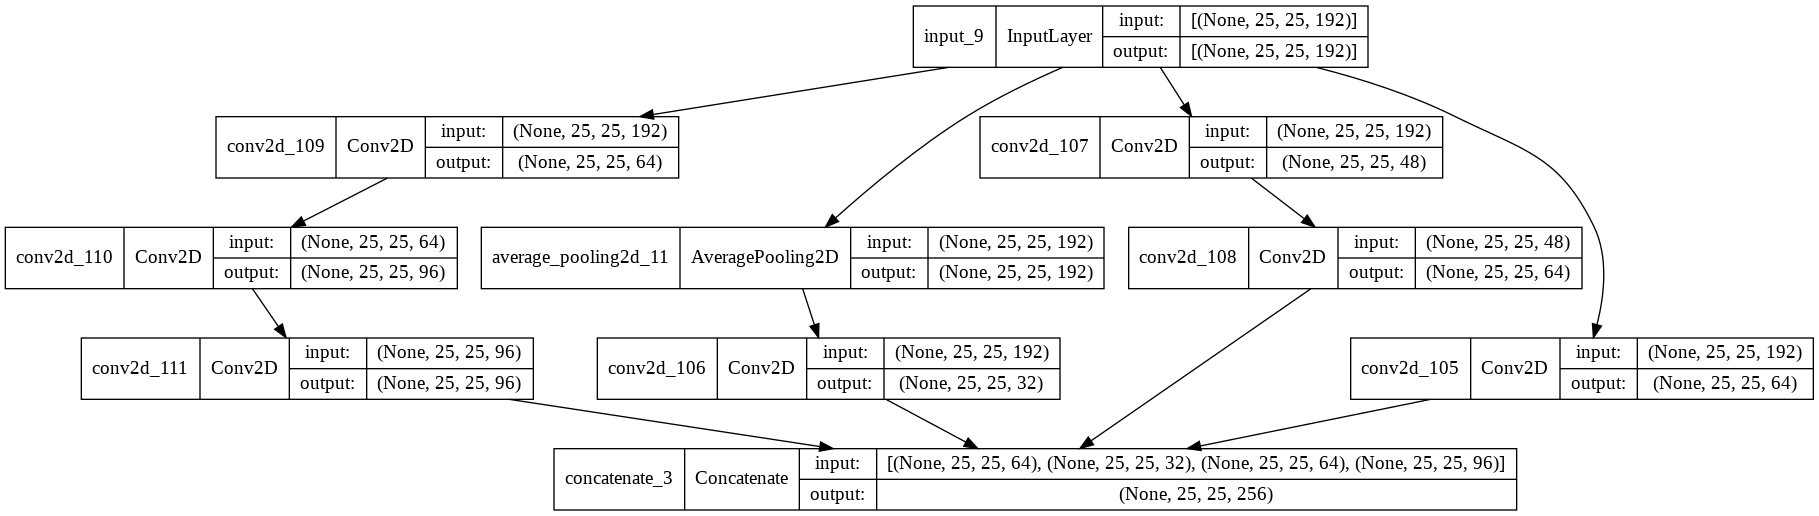

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Concatenate, Input, AveragePooling2D
# Tensor(多維向量) -> Layer(func) -> Tensor(多維向量)
i = Input(shape=(25, 25, 192))
# 1
x1 = Conv2D(64, 1, activation="relu", padding="same")(i)
# 2
x2 = AveragePooling2D(strides=1, padding="same")(i)
x2 = Conv2D(32, 1, activation="relu", padding="same")(x2)
# 3
x3 = Conv2D(48, 1, activation="relu", padding="same")(i)
x3 = Conv2D(64, 5, activation="relu", padding="same")(x3)
# 4
x4 = Conv2D(64, 1, activation="relu", padding="same")(i)
x4 = Conv2D(96, 3, activation="relu", padding="same")(x4)
x4 = Conv2D(96, 3, activation="relu", padding="same")(x4)
# concat
o = Concatenate(axis=-1)([x1, x2, x3, x4])
inception = Model(inputs=[i], outputs=[o])
plot_model(inception, to_file="my_in.png", show_shapes=True)